<a href="https://colab.research.google.com/github/fxop0218/PyTorchForBeginners/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pythorn WorkFlow

**üü¶EN**: Let's explote a an exemple PyTorch end-to-end workflow

**üü•ES**: Exploremos un ejemplo de flujo de trabajo integral de PyTorch


In [197]:
convering = {1: "Data (prepare and load)",
             2: "Build model",
             3: "Fitting the model to data (training)",
             4: "Making predictions aaaand evaluating thge model (inference)", 
             5: "Saving and loading a model",
             6: "Putting it all together"}

In [198]:
# Imports
import torch
from torch import nn
import matplotlib.pyplot as plt

## 1. Data loading

**üü¶EN**: To import the data, you can use almost any type of data format.
* Excel
* CSV
* Images
* Videos
* DNA
* Text

Machine Learnign has two main parts:
1. Get data intoi a numerical representation.
2. Build a model to learn patters in that numerical representation.

**üü•ES**: Para importar los datos, se puede utilizar practicamente cualquier formato: 
* Excel
* CSV
* Images
* Videos
* DNA
* Text

El Machine Learning tiene dos partes principales:
1. Trasnformar los datos a una representaci√≥n numerica.
2. Construir un modelo para aprender patrones en esta representaci√≥n numerica.

#### Linear regression
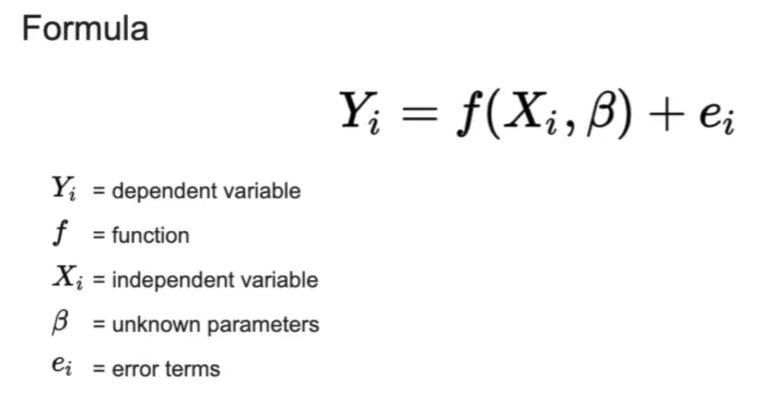

In [199]:
# Create *know* parameters

weight = 0.8
bias = 0.4

# Create

start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1) # Input
y = weight * X + bias  # Output

print(f"Tensor:\n{X[:10]}\nDependent varable:\n{y[:10]}\nX len:{len(X)} Y len: {len(y)}")

Tensor:
tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
Dependent varable:
tensor([[0.4000],
        [0.4080],
        [0.4160],
        [0.4240],
        [0.4320],
        [0.4400],
        [0.4480],
        [0.4560],
        [0.4640],
        [0.4720]])
X len:100 Y len: 100


### Splitting data into training and test sets


In [200]:
train_split = int(0.8 * len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

print(f"X_train: {len(X_train)} Y_train: {len(y_train)}\nX_test: {len(X_test)} y_test: {len(y_test)}")

X_train: 80 Y_train: 80
X_test: 20 y_test: 20


### Data visualization

In [201]:
def plot_pred(train_data=X_train,
               train_labels=y_train,
               test_data=X_test,
               test_labels=y_test,
               predictions=None):
   
  plt.figure(figsize=(10, 10))
  # train
  plt.scatter(train_data, train_labels, c="blue", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="red", s=4, label="Test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

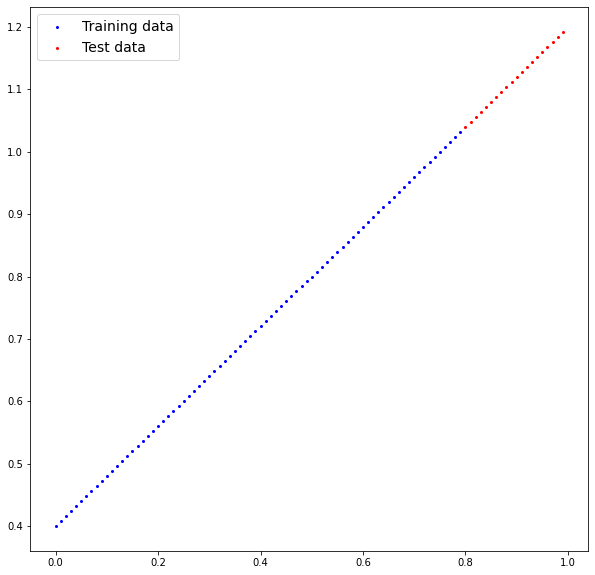

In [202]:
plot_pred()

## 2. Build ML model


In [203]:
from torch import nn
# Create linear regression model class
class LinearRegressionModel(nn.Module):
  # nn.Module => contains all the building blocks fot neural network
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float)) 
    # require_grad <= can this parameter be ypdated via gradient descent?
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # Forward method to define computation in the model

  def forward(self, x: torch.Tensor) -> torch.tensor:
    return self.weights * x + self.bias # Linear regression

**üü¶EN**: What our model does:
1. Start with random values (weight & bias)
2. Look at training data and adjust the random values to better represent (ot get closer to) the ideal values (the weight and bias values we used to) 

**üü•ES**: Que hace el modelo?
1. Empieza con valores aleatorios (weight y bias)
2. Mira en los datos de entrenamiento y ajusta los valores aleatorios para una mejor representaci√≥n, y encontrar los valores ideales.

### PyTorch model building essentials

**üü¶EN**:
* **torch.nn** => Contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* **torch.nn.Parameter** => wgat parameters should our model try and learn, ofter a PyTorch layer from torch.nn will set these for us.
* **torch.optim** => This where the optimizers in PyTorch live, they will help with gradient descent.
* **torch.nn.Module** => The base class for all neural network modules, if you a subclass it, you should overwrite forward()
* **def forward()** => All nn.Module subclasses require you yo overwrite forward(), this method defines what happens in the forward computation.
**üü•ES**:
* **torch.nn** => Contiene todos los edificios para grafos computacionales (una red neuronal puede considerarse un grafo computacional)
* **torch.nn.Parameter** => Qu√© par√°metros debe intentar aprender nuestro modelo, a menudo una capa PyTorch de torch.nn los establecer√° por nosotros.
* **torch.optim** => Aqu√≠ es donde viven los optimizadores en PyTorch, que ayudar√°n con el descenso de gradiente.
* **torch.nn.Module** => La clase base para todos los m√≥dulos de redes neuronales, si la subclase, debe sobrescribir forward()
* **def forward()** => Todas las subclases de nn.Module requieren que se sobrescriba forward(), este m√©todo define lo que ocurre en el c√°lculo forward.


### Checking the contents of out pytorch model

**üü¶EN**: No we've created a model, let's see what's inside

So we can check our model parameters or whet's inside our model using `.parameters()`

**üü•ES**: No hemos creado un modelo, vamos a ver lo que hay dentro

As√≠ que podemos comprobar los par√°metros de nuestro modelo o lo que hay dentro de nuestro modelo usando `.parameters()`.

In [204]:
# Create a random seed
torch.manual_seed(10)

# Create model instance
model = LinearRegressionModel()
list(model.parameters())

[Parameter containing:
 tensor([-0.6014], requires_grad=True), Parameter containing:
 tensor([-1.0122], requires_grad=True)]

In [205]:
model.state_dict()

OrderedDict([('weights', tensor([-0.6014])), ('bias', tensor([-1.0122]))])

### Making predictions using `torch.inference_mode()`

**üü¶EN**: To check our model's predictive power, let's see how well is predicts `y_tests` based on `X_test`.

When we pass data through our model, it's going to run it through the `forward()` method

**üü•ES**: Para comprobar el poder predictivo de nuestro modelo, veamos c√≥mo predice `y_pruebas` bas√°ndose en `X_prueba`s.

Cuando pasamos los datos a trav√©s de nuestro modelo, se va a ejecutar a trav√©s del m√©todo `forward()`

In [206]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model(X_test)

y_preds

tensor([[-1.4933],
        [-1.4993],
        [-1.5054],
        [-1.5114],
        [-1.5174],
        [-1.5234],
        [-1.5294],
        [-1.5354],
        [-1.5414],
        [-1.5474],
        [-1.5535],
        [-1.5595],
        [-1.5655],
        [-1.5715],
        [-1.5775],
        [-1.5835],
        [-1.5895],
        [-1.5956],
        [-1.6016],
        [-1.6076]])

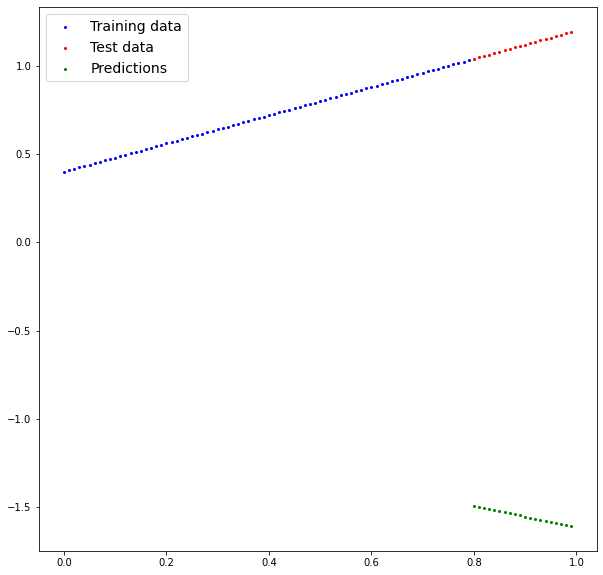

In [207]:
plot_pred(predictions=y_preds)

## 3. Train Model

**üü¶EN**: The whole idea of training is for a model to move form some *unknown* parameters (these mat be random) to some *know* parameters.

Or in other words from a poor representation of the data to a better representation of the data. 

One way to measure how poor or how wrong your models predictiosn are is to use a loss function. 

*Loss functions* can be called cost functions or criterios functions to. 

**Loss function** is a function to measure how wrong your model's predictions are to the ideal outputs. 

**Optimizer**: Takes into account the loss of a model and adjust the model's parametes (e.g. weight and bias) to imporove loss functions

And specifically for PyTorch, we need:
* A training loop
* A testing loop

**üü•ES**: La idea del entrenamiento es que un modelo pase de unos par√°metros *desconocidos* (que pueden ser aleatorios) a unos par√°metros *conocidos*.

O, en otras palabras, de una mala representaci√≥n de los datos a una mejor representaci√≥n de los datos.

Una ade las manera de medir cuando de pobre o si estan equivocadas las predicci√≥nes de tu modelo es usando las loss functions. 

*Las funciones de p√©rdida pueden denominarse funciones de coste o funciones de criterio. 

**Loss function** es una funci√≥n para medir lo err√≥neas que son las predicciones de su modelo con respecto a los resultados ideales.

**Optimizador**: Tiene en cuenta la p√©rdida de un modelo y ajusta los par√°metros del modelo (por ejemplo, el peso y el sesgo) para mejorar el resultado de loss function

Especificamente para PyTorch necesitamso:
* Un loop de entrenamiento
* Un loop de test

[torch.optim](https://pytorch.org/docs/stable/optim.html)


In [208]:
list(model.parameters())

[Parameter containing:
 tensor([-0.6014], requires_grad=True), Parameter containing:
 tensor([-1.0122], requires_grad=True)]

In [209]:
# Setup a loss function
loss_f = nn.L1Loss()

# Setup optimizer (Stochastic gradient descent)
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01) 

## Building a training / test loop in PyTorch

**üü¶EN**: Training loop needs:
1. Loop through the data
2. Forward pass (this involves data movin throught our model's `forward()` functions) to make predictions on data - also called forward propagation
3. Calculate the loss (compare forwoard pass predictions to grond thruth labels)
4. Optimizer zero grad
5. Loss backward - move backwards through **BACKPROPAGATION**
6. Optimizer step - use the optimizers to adjust our model's parameter to try and improve the loss. **GRADIENT DESCENT**

**üü•ES**: Necesidades del bucle de formaci√≥n:
1. Bucle a trav√©s de los datos
2. Pasar hacia delante (esto implica que los datos se muevan a trav√©s de las funciones `forward()` de nuestro modelo) para hacer predicciones sobre los datos - tambi√©n llamado propagaci√≥n hacia delante.
3. 3. Calcular la p√©rdida (comparar las predicciones del paso anterior con las etiquetas verdaderas)
4. Optimizador cero grad
5. P√©rdida hacia atr√°s - retroceder mediante **PROPAGACI√ìN HACIA ATR√ÅS**.
6. Optimizador paso - utilizar los optimizadores para ajustar el par√°metro de nuestro modelo para tratar de mejorar la p√©rdida. **DESCENSO GRADIENTE**

In [210]:
list(model.eval().parameters())

[Parameter containing:
 tensor([-0.6014], requires_grad=True), Parameter containing:
 tensor([-1.0122], requires_grad=True)]

In [211]:
torch.manual_seed(10)
epochs = 300

# Track vals
test_loss_values = []
epoch_count = []
loss_values = []
# Loop the data

for epoch in range(epochs):
  # Set the model to training mode
  model.train() # Train mode in pytorch
  # 1. Forward pass
  y_pred = model(X_train)

  # 2. Calculate the loss
  loss = loss_f(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  # 5. Set the optimizer (perform gradient descent)
  optimizer.step()

  model.eval() # Turns off different settings in the model not needed fro evaluation/testing (Dropout etc...)

  with torch.inference_mode(): # off gradient tracking and couple more things behind the scenes.
    # 1. Forward pass
    test_pred = model(X_test)

    # 2. Calculate the loss
    test_loss = loss_f(test_pred, y_test)
  if epoch % 10 == 0:
    test_loss_values.append(test_loss)
    epoch_count.append(epoch)
    loss_values.append(loss)
    print(f"Epoch: {epoch} - Loss {loss} /--/ State: {model.state_dict()}")



Epoch: 0 - Loss 1.9657598733901978 /--/ State: OrderedDict([('weights', tensor([-0.5974])), ('bias', tensor([-1.0022]))])
Epoch: 10 - Loss 1.8501574993133545 /--/ State: OrderedDict([('weights', tensor([-0.5579])), ('bias', tensor([-0.9022]))])
Epoch: 20 - Loss 1.7345550060272217 /--/ State: OrderedDict([('weights', tensor([-0.5184])), ('bias', tensor([-0.8022]))])
Epoch: 30 - Loss 1.618952751159668 /--/ State: OrderedDict([('weights', tensor([-0.4789])), ('bias', tensor([-0.7022]))])
Epoch: 40 - Loss 1.5033502578735352 /--/ State: OrderedDict([('weights', tensor([-0.4394])), ('bias', tensor([-0.6022]))])
Epoch: 50 - Loss 1.3877480030059814 /--/ State: OrderedDict([('weights', tensor([-0.3999])), ('bias', tensor([-0.5022]))])
Epoch: 60 - Loss 1.2721455097198486 /--/ State: OrderedDict([('weights', tensor([-0.3604])), ('bias', tensor([-0.4022]))])
Epoch: 70 - Loss 1.1565431356430054 /--/ State: OrderedDict([('weights', tensor([-0.3209])), ('bias', tensor([-0.3022]))])
Epoch: 80 - Loss 1

In [212]:
with torch.inference_mode():
  y_preds_new = model(X_test)

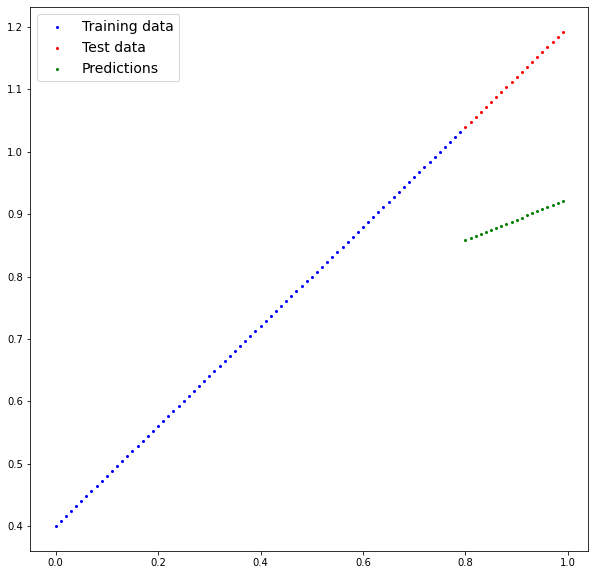

In [213]:
plot_pred(predictions=y_preds_new)

In [214]:
test_loss_values

[tensor(2.6529),
 tensor(2.5176),
 tensor(2.3822),
 tensor(2.2469),
 tensor(2.1115),
 tensor(1.9762),
 tensor(1.8408),
 tensor(1.7055),
 tensor(1.5701),
 tensor(1.4347),
 tensor(1.2994),
 tensor(1.1640),
 tensor(1.0287),
 tensor(0.8933),
 tensor(0.7580),
 tensor(0.6363),
 tensor(0.5411),
 tensor(0.4684),
 tensor(0.4137),
 tensor(0.3730),
 tensor(0.3430),
 tensor(0.3204),
 tensor(0.3032),
 tensor(0.2887),
 tensor(0.2776),
 tensor(0.2665),
 tensor(0.2578),
 tensor(0.2495),
 tensor(0.2415),
 tensor(0.2335)]

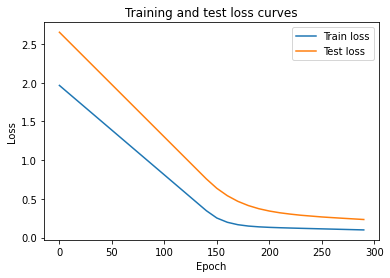

In [215]:
import numpy as np
# Plot the loss curve
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend( )

### Saving the model

**üü¶EN**: There are three main methods you should about for saving and lading models in PyTorch

1. `torch.save()` - Allows you save a PyTorch object in Python's pickle format
2. `torch.load()` - Allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allosws to load a model's saved state dictionary

**üü•ES**: Existen tres m√©todos principales para guardar y cargar modelos en PyTorch

1. `torch.save()` - Te permite guardar un objeto PyTorch en el formato pickle de Python
2. `torch.load()` - Permite cargar un objeto PyTorch guardado.
3. `torch.nn.Module.load_state_dict()` - Permite cargar el diccionario de estado guardado de un modelo

In [216]:
# Saving model
from pathlib import Path

# Create model directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "pythorch_workflow.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model.state_dict(), f=MODEL_SAVE_PATH)
print(f"Model saved into {MODEL_SAVE_PATH}")

Model saved into models/pythorch_workflow.pth


In [217]:
# Load model

# To load a saved state_dic we hace to instance a new intance of our model class

loaded_model = LinearRegressionModel()
loaded_model.state_dict()

OrderedDict([('weights', tensor([-0.6014])), ('bias', tensor([-1.0122]))])

In [218]:
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
print(f"Not loaded model: {model.state_dict()}\nLoaded Model: {loaded_model.state_dict()}")

Not loaded model: OrderedDict([('weights', tensor([0.3236])), ('bias', tensor([0.6000]))])
Loaded Model: OrderedDict([('weights', tensor([0.3236])), ('bias', tensor([0.6000]))])


## Putting it all together

**üü¶EN**: Let's go back through the steps above and see it all in one place.

**üü•ES**: Repasemos los pasos anteriores y ve√°moslo todo en un solo lugar.

In [219]:
import torch
from torch import nn
import matplotlib.pyplot as plt

**üü¶EN**: Create device-agnostic code, this means if we've got access to a GPU, our code will use it (for potentially faster computing)

If don't have avaible GPU, the code will use CPU.

**üü•ES**: Crear c√≥digo agn√≥stico al dispositivo, esto significa que si tenemos acceso a una GPU, nuestro c√≥digo la utilizar√° (para un c√°lculo potencialmente m√°s r√°pido).

Si no disponemos de GPU, el c√≥digo utilizar√° la CPU.

In [220]:
# Setup
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cpu


In [221]:
# Create *know* parameters

weight = 0.8
bias = 0.4

# Create

start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1) # Input
y = weight * X + bias  # Output

print(f"Tensor:\n{X[:10]}\nDependent varable:\n{y[:10]}\nX len:{len(X)} Y len: {len(y)}")

Tensor:
tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]])
Dependent varable:
tensor([[0.4000],
        [0.4080],
        [0.4160],
        [0.4240],
        [0.4320],
        [0.4400],
        [0.4480],
        [0.4560],
        [0.4640],
        [0.4720]])
X len:100 Y len: 100


In [222]:
# Split data

train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [223]:
def plot_pred(train_data=X_train,
               train_labels=y_train,
               test_data=X_test,
               test_labels=y_test,
               predictions=None):
   
  plt.figure(figsize=(10, 10))
  # train
  plt.scatter(train_data, train_labels, c="blue", s=4, label="Training data")

  plt.scatter(test_data, test_labels, c="red", s=4, label="Test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="g", s=4, label="Predictions")

  plt.legend(prop={"size": 14})

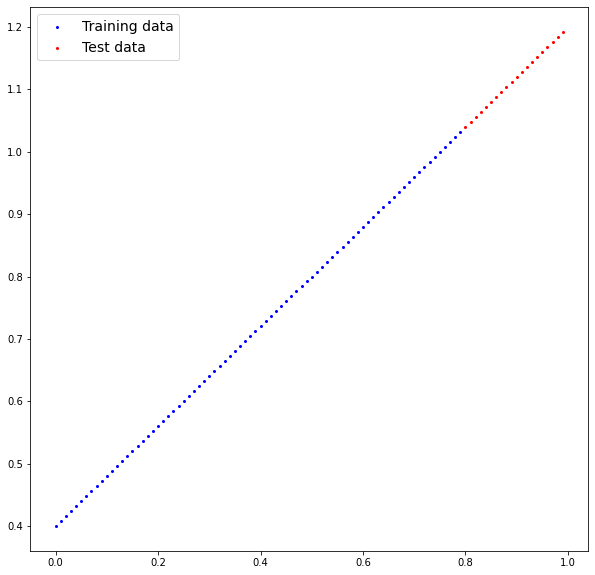

In [224]:
# Plot the data
# Note: If you don't have the plot_predictios() function loaded, this will be a error.
plot_pred(X_train, y_train, X_test, y_test)

### Building PyTorch Lineal model

In [225]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # nn.Linear for creating the model
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)

    # Forward method to define computation in the model

  def forward(self, x: torch.Tensor) -> torch.tensor:
    return self.linear_layer(x)# Linear regression

In [226]:
# Manual seed
torch.manual_seed(10)
model_B = LinearRegressionModelV2()
print(f"{model_B} State disc: {model_B.state_dict()}")

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
) State disc: OrderedDict([('linear_layer.weight', tensor([[-0.0838]])), ('linear_layer.bias', tensor([-0.0343]))])


In [227]:
# Check the model current device
next(model_B.parameters()).device

device(type='cpu')

In [228]:
# Set the model to use target device
model_B.to(device)
next(model_B.parameters()).device

device(type='cpu')

## Training 

**üü¶EN**: For training we need:
* Loss function
* Optimizer
* Training loop
* Test loop

**üü•ES**: Para el entrenamiento necesitamos:
* Funci√≥n de p√©rdida
* Optimizador
* Bucle de entrenamiento
* Bucle de prueba

In [229]:
# Loss function
loss_fn = nn.L1Loss()

# Optimizer funcion
optimizer = torch.optim.SGD(params=model_B.parameters(), lr=0.02)

In [230]:
# Training loop
torch.manual_seed(30)

epochs = 250

# Put data on the target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_B.train()
  # 1. Forward pass
  y_pred = model_B(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # TEST
  model_B.eval()
  with torch.inference_mode():
    test_pred = model_B(X_test)

    test_loss = loss_f=(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} - Loss {loss} /--/ State: {model.state_dict()}")



Epoch: 0 - Loss 0.7834000587463379 /--/ State: OrderedDict([('weights', tensor([0.3236])), ('bias', tensor([0.6000]))])
Epoch: 10 - Loss 0.5521950721740723 /--/ State: OrderedDict([('weights', tensor([0.3236])), ('bias', tensor([0.6000]))])
Epoch: 20 - Loss 0.3209899961948395 /--/ State: OrderedDict([('weights', tensor([0.3236])), ('bias', tensor([0.6000]))])
Epoch: 30 - Loss 0.1630236804485321 /--/ State: OrderedDict([('weights', tensor([0.3236])), ('bias', tensor([0.6000]))])
Epoch: 40 - Loss 0.12092536687850952 /--/ State: OrderedDict([('weights', tensor([0.3236])), ('bias', tensor([0.6000]))])
Epoch: 50 - Loss 0.10821749269962311 /--/ State: OrderedDict([('weights', tensor([0.3236])), ('bias', tensor([0.6000]))])
Epoch: 60 - Loss 0.1006312146782875 /--/ State: OrderedDict([('weights', tensor([0.3236])), ('bias', tensor([0.6000]))])
Epoch: 70 - Loss 0.09369999915361404 /--/ State: OrderedDict([('weights', tensor([0.3236])), ('bias', tensor([0.6000]))])
Epoch: 80 - Loss 0.08684782683

In [231]:
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_B.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.7916]])),
             ('linear_layer.bias', tensor([0.4067]))])

And the original values for weights and bias are:
weights: 0.8, bias: 0.4


### Making and evaluating predictions

In [232]:
# Turn model into evaluation model
model_B.eval()

# Makin prediction on the test data
with torch.inference_mode():
  y_preds = model_B(X_test)

y_preds

tensor([[1.0400],
        [1.0479],
        [1.0558],
        [1.0638],
        [1.0717],
        [1.0796],
        [1.0875],
        [1.0954],
        [1.1033],
        [1.1113],
        [1.1192],
        [1.1271],
        [1.1350],
        [1.1429],
        [1.1508],
        [1.1588],
        [1.1667],
        [1.1746],
        [1.1825],
        [1.1904]])

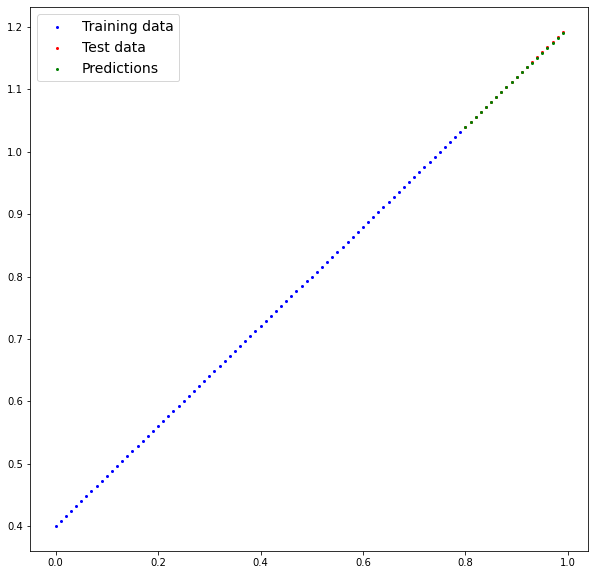

In [233]:
plot_pred(predictions=y_preds.cpu())

### Saving and loading a trained model

In [234]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "pythorch_workflow_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model_B.state_dict(), f=MODEL_SAVE_PATH)
print(f"Model saved into {MODEL_SAVE_PATH}")

Model saved into models/pythorch_workflow_2.pth


In [235]:
# Create a new instance of linear regression model
loaded_model_B = LinearRegressionModelV2()

loaded_model_B.state_dict()
print(MODEL_SAVE_PATH)

models/pythorch_workflow_2.pth


In [236]:
loaded_model_B.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_B.to(device)

print(f"Not loaded model: {model_B.state_dict()}\n Loaded model: {loaded_model_B.state_dict()}")

Not loaded model: OrderedDict([('linear_layer.weight', tensor([[0.7916]])), ('linear_layer.bias', tensor([0.4067]))])
 Loaded model: OrderedDict([('linear_layer.weight', tensor([[0.7916]])), ('linear_layer.bias', tensor([0.4067]))])
